MICE [ multivariate imputation by


chained equation ]

---

lec 40

---
used when data missing at random

---
procedure
[1] replace all missing value by mean one of its coloumn
[2] then start left to right coloumn first take left first missing value choose another coloumn data as traing to any algorithm and provide test data as the data of that particular missing value raw and get the predicted value of that missing value


---
repeat this process till the number of iteration and subtract it0-it1 do this when the missing value subtract become 0




OUTLIERS

---
**Z Score** method for outliers detection and removal

here assumtion is the cloumn shoud be in normal distridution looking like  bell cure

here your 95% value lies between [mean+- 3*standrad deviaton ]

when value doesn't occur in this range then it call outliers

you can solve by trimming and capping





In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<ipython-input-3-828fef352967>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
<ipython-input-3-828fef352967>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


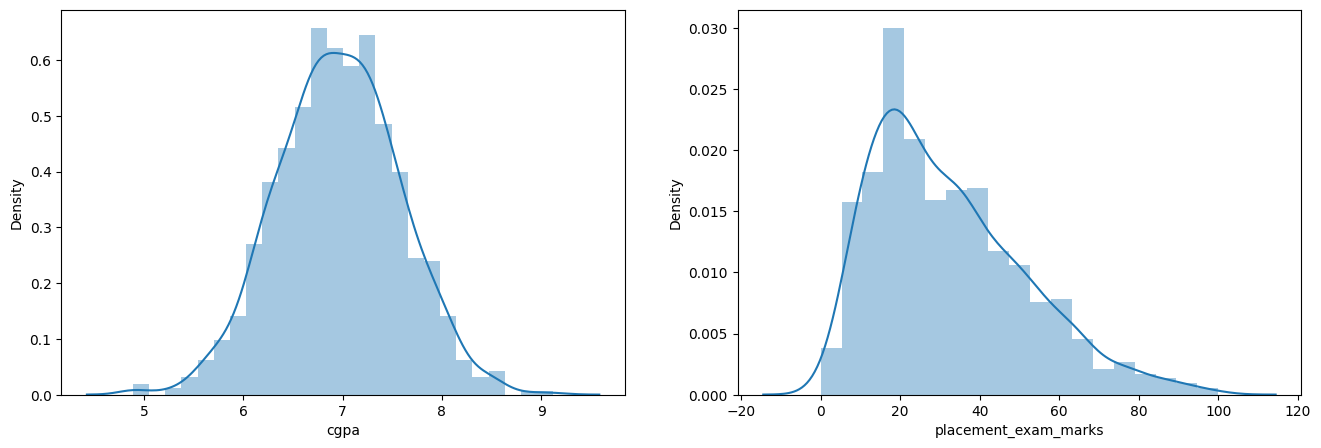

In [3]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()


upper graphs state that only cgpa is normally distributed so we apply z-score on  only cgpa

In [8]:
print("mean of cgpa",df['cgpa'].mean())
print("std of cgpa",df['cgpa'].std())
print("max of cgpa",df['cgpa'].max())
print("min of cgpa",df['cgpa'].min())


mean of cgpa 6.96124
std of cgpa 0.6158978751323894
max of cgpa 9.12
min of cgpa 4.89


In [9]:
print("highest allowed",df['cgpa'].mean()+3*df['cgpa'].std())
print("lowest allowed",df['cgpa'].mean()-3*df['cgpa'].std())

highest allowed 8.808933625397168
lowest allowed 5.113546374602832


In [10]:
df[(df['cgpa']>8.80) | (df['cgpa']<5.11)]
#clearly show the outliers

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# trimming

In [11]:
new_df=df[(df['cgpa']<8.80) & (df['cgpa']>5.11)]
new_df
#simply removed outliers

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


# capping

In [12]:
upper_limit=df['cgpa'].mean()+3*df['cgpa'].std()
lower_limit=df['cgpa'].mean()-3*df['cgpa'].std()

In [13]:
df['cgpa']=np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [15]:
df.shape

(1000, 3)

In [16]:
df['cgpa'].describe()

,cgpa
count,1000.000000
mean,6.961499
std,0.612688
min,5.113546
25%,6.550000
50%,6.960000
75%,7.370000
max,8.808934


**METHOD 2 USING iqr and boxplot**

---

here basicaly data used which is skewd and the concept of qurtiles and inter qurtile range is used

---





In [17]:
df.sample(5)

,cgpa,placement_exam_marks,placed
80,6.87,46.0,1
685,6.05,87.0,1
566,6.03,25.0,0
204,7.01,5.0,1
416,7.51,55.0,1


In [18]:
#here we are considering the placement exam marks beacase it is skewed
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


<Axes: ylabel='placement_exam_marks'>

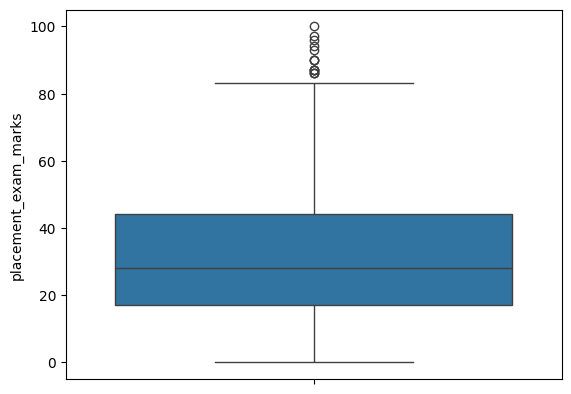

In [19]:
sns.boxplot(df['placement_exam_marks'])


In [21]:
per25=df['placement_exam_marks'].quantile(0.25)
per75=df['placement_exam_marks'].quantile(0.75)

In [22]:
iqr=per75-per25

In [23]:
upper_limit=per75+1.5*iqr
lower_limit=per25-1.5*iqr

In [28]:
df[(df['placement_exam_marks']>upper_limit)|(df['placement_exam_marks']<lower_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


# trimmimg

In [32]:
new_df=df[(df['placement_exam_marks']<upper_limit)]
#as we can analze there lower limit is not impacting outliers which means there is nothing is less than the lower limit thats whay we writnig this pice of code

In [33]:
new_df.shape

(985, 3)

<ipython-input-34-daab2996956b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
<ipython-input-34-daab2996956b>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


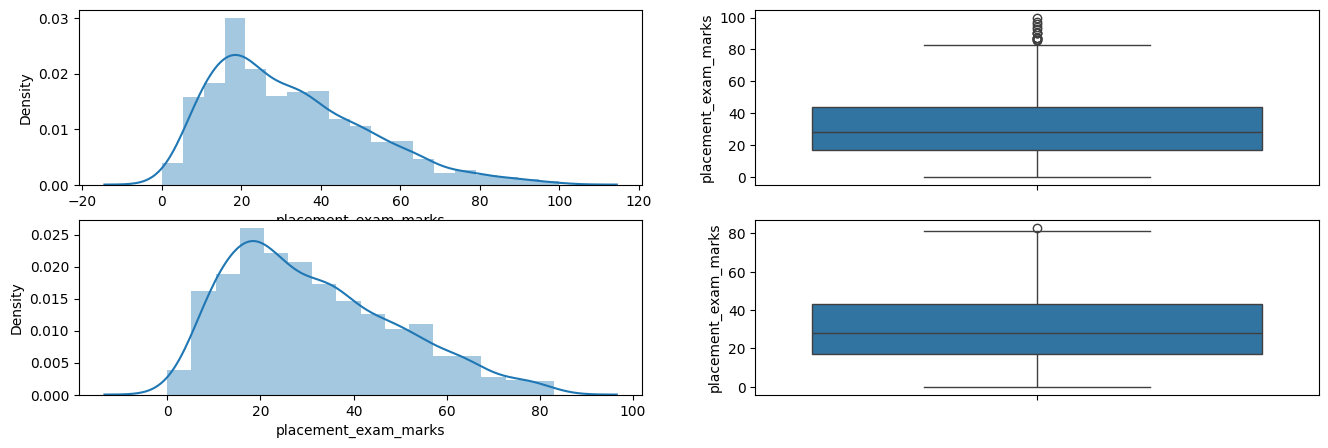

In [34]:
plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])
plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])
plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])
plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])
plt.show()

# capping


In [35]:
new_df_cap=df.copy()

In [36]:
new_df_cap['placement_exam_marks']=np.where(
    new_df_cap['placement_exam_marks']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks']<lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)


<ipython-input-37-98c35fbfaf94>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
<ipython-input-37-98c35fbfaf94>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


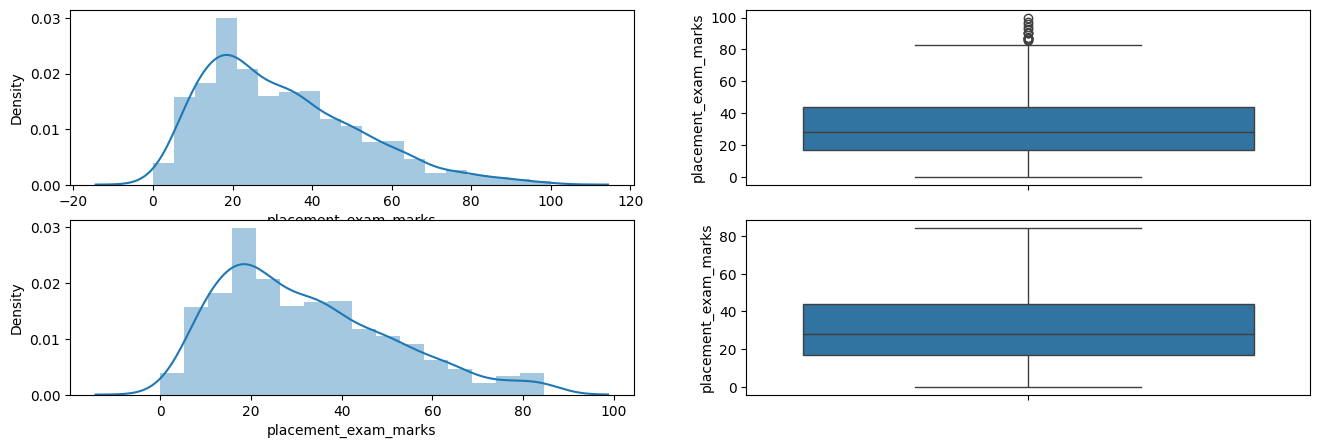

In [37]:
plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])
plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])
plt.show()

**method 3 precentiles and thresold**


---
here wonsorization is itroduced

winsorization:capping in percentile method



In [38]:
df=pd.read_csv('/content/weight-height.csv')

df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [40]:
df.shape

(10000, 3)

In [42]:
df['Height'].describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


<ipython-input-43-26dbcd94f059>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

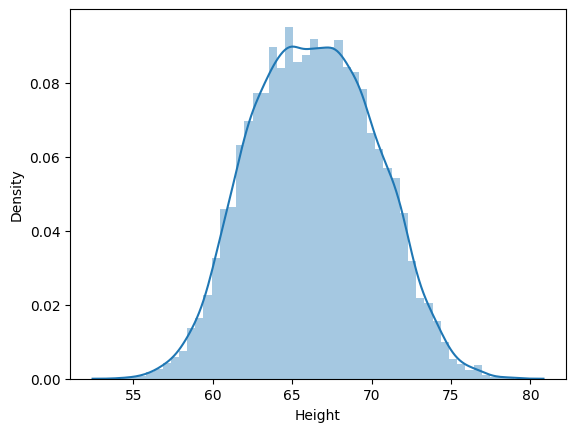

In [43]:
sns.distplot(df['Height'])

<Axes: ylabel='Height'>

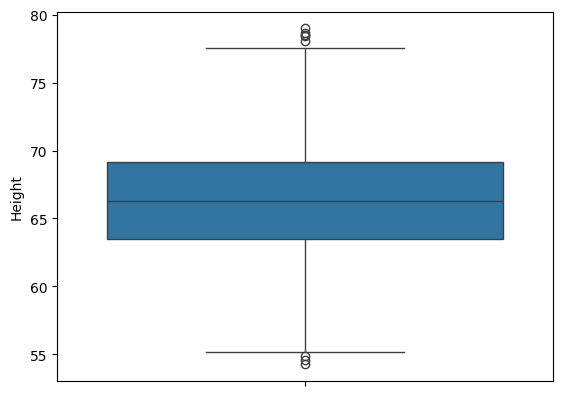

In [44]:
sns.boxplot(df['Height'])

In [45]:
up_thresold=df['Height'].quantile(0.99)
low_thresold=df['Height'].quantile(0.01)

# trimming

In [53]:
new_df=df[(df['Height']<=up_thresold)&(df['Height']>=low_thresold)]

In [54]:
new_df['Height'].describe()

,Height
count,9800.000000
mean,66.364366
std,3.645075
min,58.134496
25%,63.577162
50%,66.318070
75%,69.119896
max,74.785714


<ipython-input-55-edc1cb406df2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

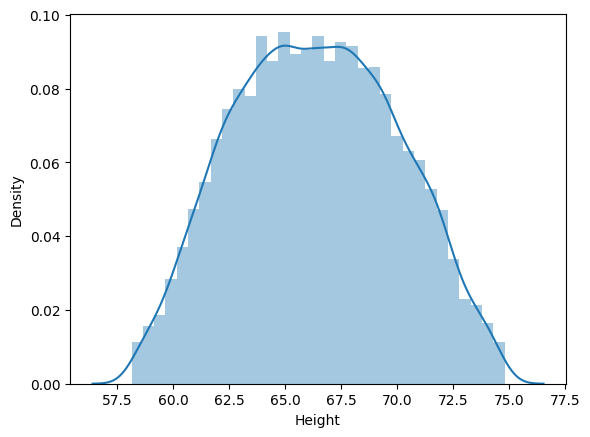

In [55]:
sns.distplot(new_df['Height'])

<Axes: ylabel='Height'>

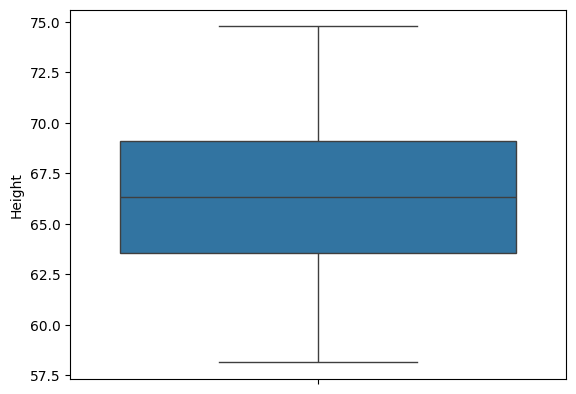

In [56]:
sns.boxplot(new_df['Height'])

# capping / winsoriaztion

In [58]:
df['Height']=np.where(df['Height']>up_thresold,up_thresold,
         np.where(df['Height']<low_thresold,low_thresold,
                  df['Height']))

In [59]:
df.shape

(10000, 3)

<ipython-input-60-26dbcd94f059>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

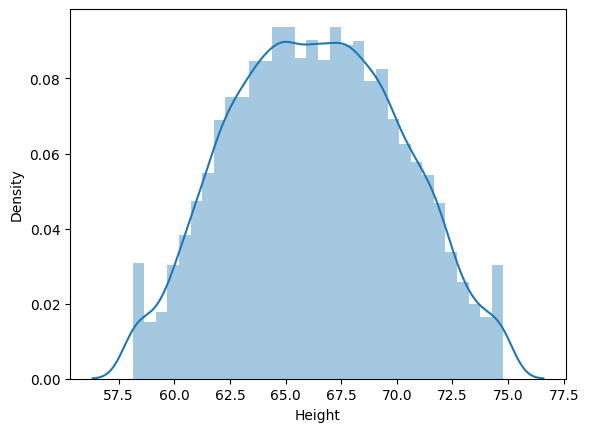

In [60]:
sns.distplot(df['Height'])

<Axes: ylabel='Height'>

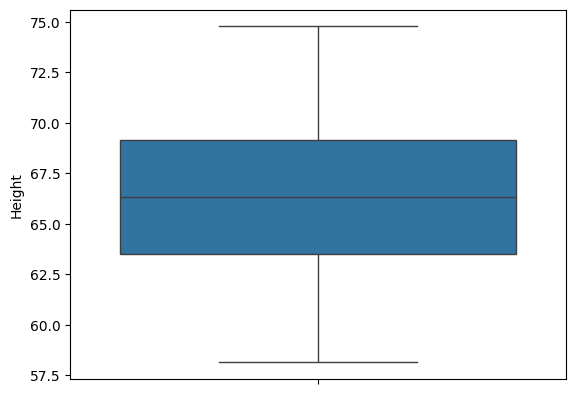

In [61]:
sns.boxplot(df['Height'])